# MNIST with PyTorch
First, we are going to run some code snippets for smooth debugging. To ensure that Python reloads changed code, we will execute the following statements [Reference on StackOverflow](https://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)

In [1]:
# For automatic file reloading 
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Importing the required modules
 - We can access the MNIST Database from PyTorch [torchvision.datasets.MNIST](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html)
 - We use matplotlib for plotting 

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
from datasets.mnist_wrapper import MNISTWrapper

root_path = os.path.dirname(os.path.abspath(os.getcwd()))
mnist_root = os.path.join(root_path, "datasets", "mnist")
print('Dataset Root:\t',mnist_root)
train_dataset = MNISTWrapper(mnist_root,train=True, download=True)
test_dataset = MNISTWrapper(mnist_root, train=False, download=True)
train_dataset_length = int(0.8*len(train_dataset))
val_dataset_length = len(train_dataset) - train_dataset_length
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_dataset_length, val_dataset_length], generator=torch.Generator().manual_seed(42))
print('Train Dataset:\t{}\nVal Dataset:\t{}\nTest Dataset:\t{}\n'.format(len(train_dataset),len(val_dataset),len(test_dataset)))

Dataset Root:	 /Users/ajaynarayanan/Projects/datasets/mnist
Train Dataset:	48000
Val Dataset:	12000
Test Dataset:	10000



### Plotting Sample Images
Let's try plotting sample images from the MNIST Dataset

The shape of our greyscale images:  torch.Size([28, 28])
Input feature count:  784


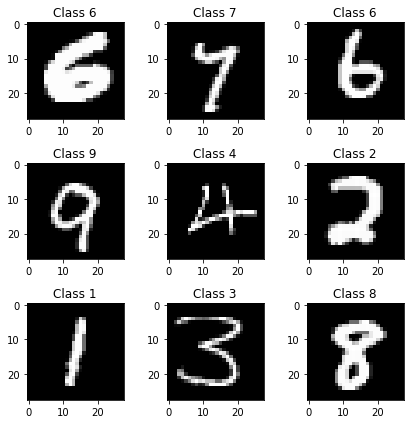

In [26]:
import torchvision
plt.rcParams['figure.figsize'] = (6,6) # Make the figures a bit bigger

for i in range(9):
    image = (train_dataset[i][0].squeeze())
    label = train_dataset[i][1] 
    plt.subplot(3,3,i+1)
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.title("Class {}".format(label.nonzero().item()))
    

# plt.imshow(train_dataset[0][0].squeeze(), cmap='gray',interpolation='none')
    
plt.tight_layout()
print('The shape of our greyscale images: ', image.shape)

input_features = image.shape[0] * image.shape[1]
print('Input feature count: ', input_features)

### Setting up Tensorboard
We'll setup tensorboard to debug our network

In [14]:
import sys
!{sys.executable} -m pip install tensorboard

In [36]:
from torch.utils.tensorboard import SummaryWriter
from pytorch_lightning.loggers import TensorBoardLogger

linear_logger = TensorBoardLogger(save_dir='lightning_logs', name="linear_classifier")

In [48]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs --port 6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 25052), started 0:00:01 ago. (Use '!kill 25052' to kill it.)

### Testing with a fully connected Neural Network
Initially, we'll use a fully connected NN with 3 layers.

In [38]:
from models.linear_classifier import LinearClassifier
from torchinfo import summary
import pytorch_lightning as pl

hparams = {
    'input_features': input_features,
    'output_features': 10,
    'lr': 1e-4,
    'activation_function': 'LeakyReLU',
    'batch_size': 2
}

model = LinearClassifier(hparams, train_dataset, val_dataset, test_dataset)
summary(model)

trainer = pl.Trainer(
    logger=linear_logger,
    max_epochs=20,
    log_every_n_steps=5,
    gpus=1 if torch.cuda.is_available() else None
)

trainer.fit(model)

/Users/ajaynarayanan/opt/anaconda3/lib/python3.9/site-packages/pytorch_lightning/loops/utilities.py:91: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type       | Params
-------------------------------------
0 | model | Sequential | 1.9 M 
-------------------------------------
1.9 M     Trainable params
0         Non-trainable params
1.9 M     Total params
7.548     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/Users/ajaynarayanan/opt/anaconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:486: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  rank_zero_warn(
/Users/ajaynarayanan/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

/Users/ajaynarayanan/opt/anaconda3/lib/python3

### Testing the Model
Let's now test our model accuracy

In [34]:
trainer.test(model)

/Users/ajaynarayanan/opt/anaconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:486: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           1.4907423257827759
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 1.4907423257827759}]

### Testing with a Convolutional Network followed by a Linear Layer
The basic linear layer seems to be limited in the amount it is able to learn perhaps with different hyperparameters it can get more results. However we shall move to a better architecture with the use of convolutional layers

In [ ]:
from models.convolutional_classifier import ConvolutionalClassifier
from torchinfo import summary
import pytorch_lightning as pl

hparams = {
    'input_channels': 1,
    'output_features': 10,
    'lr': 1e-4,
    'activation_function': 'LeakyReLU',
    'batch_size': 2
}

model = ConvolutionalClassifier(hparams, train_dataset, val_dataset, test_dataset)
# summary(model)

conv_logger = TensorBoardLogger(save_dir='lightning_logs', name="convolutional_classifier")

trainer = pl.Trainer(
    logger=conv_logger,
    max_epochs=20,
    log_every_n_steps=1,
    progress_bar_refresh_rate=10,
    gpus=1 if torch.cuda.is_available() else None
)

trainer.fit(model)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type       | Params
------------------------------------
0 | conv | Sequential | 10.7 K
1 | lin  | Sequential | 80.3 K
------------------------------------
91.0 K    Trainable params
0         Non-trainable params
91.0 K    Total params
0.364     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

ERROR: Unexpected segmentation fault encountered in worker.
 

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [51]:
trainer.test(model)

/Users/ajaynarayanan/opt/anaconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:486: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss            1.474503517150879
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 1.474503517150879}]